In [13]:
BEIJING,CHANGCHUN,MULUMUQI,WUHAN,GUANGZHOU,SHENZHEN,BANGKOK,SHANGHAI,NEWYORK = """
BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK""".split()

In [14]:
dictionary = {}

In [15]:
connection = {
    CHANGCHUN :[BEIJING],
    MULUMUQI : [BEIJING],
    BEIJING : [MULUMUQI,CHANGCHUN,WUHAN,SHENZHEN,NEWYORK],
    NEWYORK : [BEIJING,SHANGHAI],
    SHANGHAI : [NEWYORK,WUHAN],
    WUHAN : [SHANGHAI,BEIJING,GUANGZHOU],
    GUANGZHOU : [WUHAN,BANGKOK],
    SHENZHEN : [WUHAN, BANGKOK],
    BANGKOK:[SHENZHEN,GUANGZHOU]  
}

In [16]:
import networkx as nx

In [21]:
%matplotlib inline 

In [18]:
graph = connection

In [19]:
g = nx.Graph(graph)

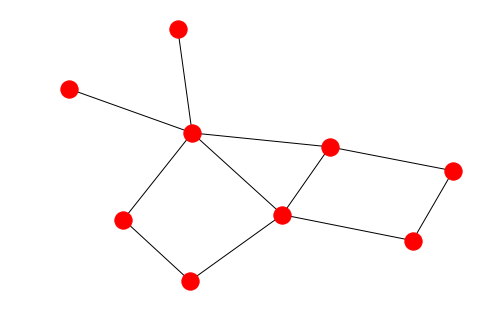

In [20]:
nx.draw(g)

In [30]:
def nagivator(start, desination,connection_graph):
    pathes = [[start]]
    seen = set()
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen:continue
        successors = connection_graph[froniter]
            
        for s in successors:
             if s == desination:
                path.append(s)
                return path
             else:
                pathes.append(path + [s])
        pathes = sorted(pathes,key = len)
        seen.add(froniter)      

In [61]:
def nagivator_bfs(start,destination,connection_graph):
    pathes = [start]
    seen = set ()
    while pathes:
        froniter = pathes.pop(0)
        if froniter in seen :continue
        
        successors = connection_graph[froniter]
        print ("standing on {} looking forward {}".format(froniter,successors))
        pathes = pathes + successors
        seen.add(froniter)
    

In [62]:
connection_2 = {
    0:[1,5],
    1:[0,2],
    2:[1,3],
    3:[2,4],
    4:[3],
    5:[0,6],
    6:[5,7],
    7:[6]
}

/Users/tom/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


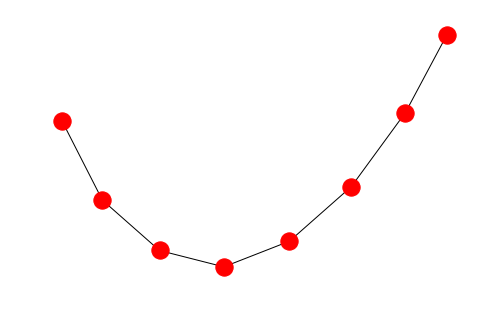

In [219]:
nx.draw(nx.Graph(connection_2))

In [65]:
nagivator_bfs(0,7,connection_2)

standing on 0 looking forward [1, 5]
standing on 1 looking forward [0, 2]
standing on 5 looking forward [0, 6]
standing on 2 looking forward [1, 3]
standing on 6 looking forward [5, 7]
standing on 3 looking forward [2, 4]
standing on 7 looking forward [6]
standing on 4 looking forward [3]


In [222]:
grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null|Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个|这个
noun =>女人|篮球|桌子|小猫
verb =>看着|坐在|听着|看见 
Adj => 蓝色的|好看的|小小的 
"""

In [223]:
import random

In [237]:
generate("verb_phrase") = generate("verb")+generate("noun_phrase")
generate('noun') = random.choice("女人 |  篮球 | 桌子 | 小猫")

SyntaxError: can't assign to function call (<ipython-input-237-1274c9ed87bd>, line 1)

In [238]:
def parse_grammar(grammar_str,sep = "=>"):
    grammar = {}
    for line in grammar_str.split('\n'):
        line = line.strip()
        if not line: continue
        target,rules = line.split(sep)
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    return grammar

In [226]:
g = parse_grammar(grammar)

In [227]:
g

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [228]:
def gene(grammar_parsed, target = 'sentence'):
    if target not in grammar_parsed:return target
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed,target = r) for r in rule if r!='null')

In [229]:
g["noun"]

[['女人'], ['篮球'], ['桌子'], ['小猫']]

In [239]:
gene(g)

'一个小猫坐在一个好看的小小的桌子'